In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import glob

path = 'data' # use your path
all_files = glob.glob(path + "/fund_net_value_*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['fund_code'] = filename[-10:-4]
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

In [3]:
df.head()

,Unnamed: 0,id,code,day,net_value,sum_value,factor,acc_factor,refactor_net_value,fund_code
0,0,12059557,41,2019-07-12,1.010,1.010,1.0,1.0,1.010,000041
1,1,12049364,41,2019-07-11,1.010,1.010,1.0,1.0,1.010,000041
2,2,12032275,41,2019-07-10,1.008,1.008,1.0,1.0,1.008,000041
3,3,12028471,41,2019-07-09,1.002,1.002,1.0,1.0,1.002,000041
4,4,12017994,41,2019-07-08,0.998,0.998,1.0,1.0,0.998,000041


In [4]:
df_fund_info = pd.read_csv("data/stock_fund_info.csv", dtype={"main_code":str})
df_fund_info.head()

,Unnamed: 0,id,main_code,name,advisor,trustee,operate_mode_id,operate_mode,underlying_asset_type_id,underlying_asset_type,start_date,end_date
0,0,23,000041,华夏全球,华夏基金管理有限公司,中国建设银行股份有限公司,401003,QDII,402001,股票型,2007-10-09,NaN
1,1,24,000042,中证财通可持续发展100指数,财通基金管理有限公司,上海银行股份有限公司,401001,开放式基金,402001,股票型,2013-03-22,NaN
2,2,25,000043,嘉实美国成长股票,嘉实基金管理有限公司,中国银行股份有限公司,401003,QDII,402001,股票型,2013-06-14,NaN
3,3,28,000049,中银标普全球,中银基金管理有限公司,招商银行股份有限公司,401003,QDII,402001,股票型,2013-03-19,NaN
4,4,33,270042,广发纳斯达克100指数（QDII）,广发基金管理有限公司,中国银行股份有限公司,401003,QDII,402001,股票型,2012-08-15,NaN


In [5]:
df_fund_info['operate_mode'].value_counts()

开放式基金    806
封闭式基金    302
ETF      190
QDII     144
LOF      123
Name: operate_mode, dtype: int64

In [6]:
df = pd.merge(df, df_fund_info, left_on='fund_code', right_on='main_code', how='left')

In [7]:
df.head()

,Unnamed: 0_x,id_x,code,day,net_value,sum_value,factor,acc_factor,refactor_net_value,fund_code,...,main_code,name,advisor,trustee,operate_mode_id,operate_mode,underlying_asset_type_id,underlying_asset_type,start_date,end_date
0,0,12059557,41,2019-07-12,1.010,1.010,1.0,1.0,1.010,000041,...,000041,华夏全球,华夏基金管理有限公司,中国建设银行股份有限公司,401003,QDII,402001,股票型,2007-10-09,NaN
1,1,12049364,41,2019-07-11,1.010,1.010,1.0,1.0,1.010,000041,...,000041,华夏全球,华夏基金管理有限公司,中国建设银行股份有限公司,401003,QDII,402001,股票型,2007-10-09,NaN
2,2,12032275,41,2019-07-10,1.008,1.008,1.0,1.0,1.008,000041,...,000041,华夏全球,华夏基金管理有限公司,中国建设银行股份有限公司,401003,QDII,402001,股票型,2007-10-09,NaN
3,3,12028471,41,2019-07-09,1.002,1.002,1.0,1.0,1.002,000041,...,000041,华夏全球,华夏基金管理有限公司,中国建设银行股份有限公司,401003,QDII,402001,股票型,2007-10-09,NaN
4,4,12017994,41,2019-07-08,0.998,0.998,1.0,1.0,0.998,000041,...,000041,华夏全球,华夏基金管理有限公司,中国建设银行股份有限公司,401003,QDII,402001,股票型,2007-10-09,NaN


In [8]:
df.columns

Index(['Unnamed: 0_x', 'id_x', 'code', 'day', 'net_value', 'sum_value',
       'factor', 'acc_factor', 'refactor_net_value', 'fund_code',
       'Unnamed: 0_y', 'id_y', 'main_code', 'name', 'advisor', 'trustee',
       'operate_mode_id', 'operate_mode', 'underlying_asset_type_id',
       'underlying_asset_type', 'start_date', 'end_date'],
      dtype='object')

In [9]:
df.drop(columns=['Unnamed: 0_x', 'id_x', 'Unnamed: 0_y', 'id_y', 'main_code'], inplace=True)

In [10]:
df.head()

,code,day,net_value,sum_value,factor,acc_factor,refactor_net_value,fund_code,name,advisor,trustee,operate_mode_id,operate_mode,underlying_asset_type_id,underlying_asset_type,start_date,end_date
0,41,2019-07-12,1.010,1.010,1.0,1.0,1.010,000041,华夏全球,华夏基金管理有限公司,中国建设银行股份有限公司,401003,QDII,402001,股票型,2007-10-09,NaN
1,41,2019-07-11,1.010,1.010,1.0,1.0,1.010,000041,华夏全球,华夏基金管理有限公司,中国建设银行股份有限公司,401003,QDII,402001,股票型,2007-10-09,NaN
2,41,2019-07-10,1.008,1.008,1.0,1.0,1.008,000041,华夏全球,华夏基金管理有限公司,中国建设银行股份有限公司,401003,QDII,402001,股票型,2007-10-09,NaN
3,41,2019-07-09,1.002,1.002,1.0,1.0,1.002,000041,华夏全球,华夏基金管理有限公司,中国建设银行股份有限公司,401003,QDII,402001,股票型,2007-10-09,NaN
4,41,2019-07-08,0.998,0.998,1.0,1.0,0.998,000041,华夏全球,华夏基金管理有限公司,中国建设银行股份有限公司,401003,QDII,402001,股票型,2007-10-09,NaN


In [11]:
df['day'] = pd.to_datetime(df['day'])

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393456 entries, 0 to 1393455
Data columns (total 17 columns):
code                        1393456 non-null object
day                         1393456 non-null datetime64[ns]
net_value                   1393456 non-null float64
sum_value                   1312884 non-null float64
factor                      1393456 non-null float64
acc_factor                  1393456 non-null float64
refactor_net_value          1393456 non-null float64
fund_code                   1393456 non-null object
name                        1393456 non-null object
advisor                     1393456 non-null object
trustee                     1393456 non-null object
operate_mode_id             1393456 non-null int64
operate_mode                1393456 non-null object
underlying_asset_type_id    1393456 non-null int64
underlying_asset_type       1393456 non-null object
start_date                  1393456 non-null object
end_date                    0 non-null float

- sum_value并不是都有的！所以没有的情况下要用net_value代替。

# 设置起止日期等全局变量

In [12]:
start_date = '20160101'
end_date = '20190710'

# 使用xirr

In [178]:
'''xirr计算函数'''
import datetime
from scipy import optimize
 
'''solution 1'''
# def xnpv(rate, cashflows):
#     return sum([cf/(1+rate)**((t-cashflows[0][0]).days/365.0) for (t,cf) in cashflows])
 
# def xirr(cashflows, guess=0.1):
#     try:
#         return optimize.newton(lambda r: xnpv(r,cashflows),guess)
#     except:
#         print('Calc Wrong')

'''solution 2'''
from datetime import date
def xirr(cashflows):
    years = [(ta[0] - cashflows[0][0]).days / 365. for ta in cashflows]
    residual = 1.0
    step = 0.05
    guess = 0.05
    epsilon = 0.0001
    limit = 10000
    while abs(residual) > epsilon and limit > 0:
        limit -= 1
        residual = 0.0
        for i, trans in enumerate(cashflows):
            residual += trans[1] / pow(guess, years[i])
        if abs(residual) > epsilon:
            if residual > 0:
                guess += step
            else:
                guess -= step
                step /= 2.0
    return guess - 1

# 测试
data = [(datetime.date(2006, 1, 24), -39967), 
        (datetime.date(2008, 2, 6), -19866), 
        (datetime.date(2010, 10, 18), 245706), 
        (datetime.date(2013, 9, 14), 52142)]
xirr(data)

0.42369774132967053

In [135]:
'''每期必投的傻瓜策略'''
# 单位净值有可能高于累计净值，因为折算的关系，就是share的数量变少了，价格变贵，为了追踪指数什么的
def strategy_1(df_internal, start_date, end_date):
    if df_partial['sum_value'].isna().any():
        value_type = 'net_value'
    else:
        value_type = 'sum_value'
    if df_internal['day'].min() > pd.to_datetime(start_date):
        start_date = df_internal['day'].min()
    if df_internal['day'].max() < pd.to_datetime(end_date):
        end_date = df_internal['day'].max()
    buy_dates = pd.date_range(start=start_date, end=end_date, freq='5B')
    invested = 0
    shares = 0
    investment_records = []
    for date in buy_dates:
        count = 0
        deposit_price = df_internal[df_internal['day']==date][value_type]
        while deposit_price.empty and count <= 5:  # 如果是春节或者国庆的节假日，延后算这笔投资
            date += 1
            deposit_price = df_internal[df_internal['day']==date][value_type]
            count += 1
        if count <= 5 and deposit_price.values[0] != 0:
            investment_records.append((date, -100))
            shares += 100 / deposit_price.values[0]
    
    withdraw_price = df_internal[df_internal['day']==end_date][value_type]
    if not withdraw_price.empty and withdraw_price.values[0] != 0:
        investment_records.append((pd.to_datetime(end_date), shares * withdraw_price.values[0]))
        invested = -sum([money for (date, money) in investment_records[:-1]])
        returned = sum([money for (date, money) in investment_records if money > 0])
        return pd.Series({"invested":invested, "returned":returned, "return":xirr(investment_records)})
    else:
        return None

In [136]:
'''first just test few groups'''
all_fund_codes = df['fund_code'].drop_duplicates()
first_10_fund_codes = all_fund_codes[:10]
df_partial = df[df['fund_code'].isin(list(first_10_fund_codes) + ['968049'])]
returns = df_partial.groupby('fund_code').apply(strategy_1, start_date, end_date)
returns

,invested,returned,return
fund_code,,,
000041,18400.0,20739.055326,0.068708
000042,18400.0,18004.500121,-0.012266
000043,18400.0,23938.170528,0.153640
000044,18400.0,23128.971261,0.133006
000049,18400.0,20748.810004,0.068970
000055,18400.0,24735.336251,0.173485
000059,18400.0,15448.545466,-0.096966
000082,18400.0,16029.743425,-0.076807
000176,18400.0,21268.351548,0.083397


In [137]:
'''run through all funds'''
returns_1 = df.groupby('fund_code').apply(strategy_1, start_date, end_date)

C:\Users\erichali\Programs\Anaconda\lib\site-packages\scipy\optimize\zeros.py:195: RuntimeWarning: Tolerance of 0.00010999999999999899 reached
  warnings.warn(msg, RuntimeWarning)


Calc Wrong
Calc Wrong
Calc Wrong
Calc Wrong
Calc Wrong
Calc Wrong
Calc Wrong
Calc Wrong
Calc Wrong
Calc Wrong
Calc Wrong
Calc Wrong
Calc Wrong
Calc Wrong
Calc Wrong


,invested,returned,return
fund_code,,,
000041,18400.0,20739.055326,0.068708
000042,18400.0,18004.500121,-0.012266
000043,18400.0,23938.170528,0.153640
000044,18400.0,23128.971261,0.133006
000049,18400.0,20748.810004,0.068970
000055,18400.0,24735.336251,0.173485
000059,18400.0,15448.545466,-0.096966
000082,18400.0,16029.743425,-0.076807
000176,18400.0,21268.351548,0.083397


In [180]:
'''一个简单的策略，在历史价格区间的下50%就买入，高于70%就卖出，陆续卖出吧，每次卖出价值100元的份额'''
def strategy_2(df_internal, start_date, end_date):
    if df_partial['sum_value'].isna().any():
        value_type = 'net_value'
    else:
        value_type = 'sum_value'
    df_internal = df_internal.sort_values(by='day', ascending=True)
    if df_internal['day'].min() > pd.to_datetime(start_date):
        start_date = df_internal['day'].min()
    if df_internal['day'].max() < pd.to_datetime(end_date):
        end_date = df_internal['day'].max()
    buy_dates = pd.date_range(start=start_date, end=end_date, freq='5B')
    invested = 0
    shares = 0
    investment_records = []
    for date in buy_dates:
        count = 0
        curr_price = df_internal[df_internal['day']==date][value_type]
        while curr_price.empty and count <= 5:  # 如果是春节或者国庆的节假日，延后算这笔投资
            date += 1
            curr_price = df_internal[df_internal['day']==date][value_type]
            count += 1
        if count <= 5 and curr_price.values[0] != 0:
            curr_idx = df_internal[df_internal['day']==date].index[0]
            curr_price = curr_price.values[0]
            buy_price = df_internal.iloc[0:curr_idx, :][value_type].quantile(0.5)
            sell_price = df_internal.iloc[0:curr_idx, :][value_type].quantile(0.7)
            investment_records.append((date, -100))
            shares += 100 / curr_price
            if curr_price < buy_price:
                investment_records.append((date, -100))
                shares += 100 / curr_price
            elif curr_price > sell_price:
                if shares > 100 / curr_price:
                    investment_records.append((date, 100))
                    shares -= 100 / curr_price
                
    withdraw_price = df_internal[df_internal['day']==end_date][value_type]
    if not withdraw_price.empty and withdraw_price.values[0] != 0:
        investment_records.append((pd.to_datetime(end_date), shares * withdraw_price.values[0]))
        invested = -sum([money for (date, money) in investment_records[:-1]])
        returned = sum([money for (date, money) in investment_records if money > 0])
        return pd.Series({"invested":invested, "returned":returned, "return":xirr(investment_records)})
    else:
        return None

In [139]:
returns_2 = df.groupby('fund_code').apply(strategy_2, start_date, end_date)

Calc Wrong
Calc Wrong
Calc Wrong
Calc Wrong
Calc Wrong
Calc Wrong
Calc Wrong
Calc Wrong
Calc Wrong
Calc Wrong
Calc Wrong


,invested,returned,return
fund_code,,,
000041,9000.0,25029.135959,0.109442
000042,17700.0,25825.975182,0.024055
000043,11700.0,27019.565422,0.156266
000044,13300.0,28691.735246,0.141468
000049,17200.0,29488.966576,0.088749
000055,18900.0,36093.781280,0.181391
000059,26000.0,29067.509188,-0.048441
000082,23000.0,25225.830222,-0.044108
000176,22000.0,33162.131918,0.101895


In [140]:
return_comparison = pd.merge(returns, returns2, on='fund_code')

In [141]:
return_comparison

,invested_x,returned_x,return_x,invested_y,returned_y,return_y
fund_code,,,,,,
000041,18400.0,20739.055326,0.068708,9000.0,25029.135959,0.109442
000042,18400.0,18004.500121,-0.012266,17700.0,25825.975182,0.024055
000043,18400.0,23938.170528,0.153640,11700.0,27019.565422,0.156266
000044,18400.0,23128.971261,0.133006,13300.0,28691.735246,0.141468
000049,18400.0,20748.810004,0.068970,17200.0,29488.966576,0.088749
000055,18400.0,24735.336251,0.173485,18900.0,36093.781280,0.181391
000059,18400.0,15448.545466,-0.096966,26000.0,29067.509188,-0.048441
000082,18400.0,16029.743425,-0.076807,23000.0,25225.830222,-0.044108
000176,18400.0,21268.351548,0.083397,22000.0,33162.131918,0.101895


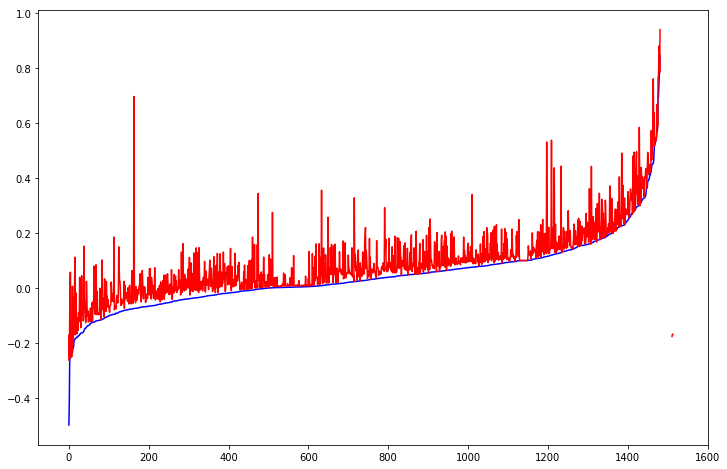

In [142]:
return_comparison.sort_values('return_x', inplace=True)
data = return_comparison[return_comparison < 1]
plt.figure(figsize=(12, 8))
plt.plot(range(len(data)), data['return_x'], 'b', range(len(data)), data['return_y'], 'r')

In [143]:
return_comparison.to_csv(start_date + ' to ' + end_date + '.csv')

In [159]:
sum((return_comparison['return_x'] < 0).values)

501

In [160]:
return_comparison

,invested_x,returned_x,return_x,invested_y,returned_y,return_y
fund_code,,,,,,
006926,700.0,685.782582,-0.498720,400.0,895.700000,-0.172117
150354,2300.0,2022.690271,-0.420972,2500.0,3310.133477,-0.264994
512480,1000.0,978.977839,-0.272379,800.0,1394.443530,-0.098928
006594,2000.0,1897.390307,-0.244044,1800.0,2714.937007,0.054606
006593,2000.0,1898.399756,-0.241885,1800.0,2715.735563,0.057585
001649,8500.0,6835.050653,-0.241860,11100.0,11504.903046,-0.253691
001612,13500.0,9661.864596,-0.240593,19000.0,16808.828561,NaN
001611,13500.0,9690.100017,-0.238648,19000.0,16840.375269,NaN
513880,500.0,495.328386,-0.238622,900.0,892.366772,-0.248885


# why 001612 xirr calculation is wrong?

In [181]:
df_001612 = df[df['fund_code'] == '001612']
strategy_2(df_001612, start_date, end_date)

invested    19000.000000
returned    16808.828561
return         -0.261275
dtype: float64